<a href="https://colab.research.google.com/github/18521144/CS114.M11.KHCL/blob/main/TH1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB1: LINEAR REGRESSION**
**Đề bài:** Xây dựng model Linear Regression dự đoán thời gian chạy chương trình dựa trên độ lớn bộ dữ liệu. Tập train và test được giảng viên cung cấp dưới dạng hai file .txt.


**Nhóm sinh viên thực hiện: NSA**
    
- 18521144 - Nguyễn Hữu Nghĩa 
- 18521353 - Trần Ngọc Sương
- 20521072 - Nguyễn Thị Kim Anh

In [65]:
#Import những packages cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_absolute_error as MAE

In [32]:
#Cấp quyền truy cập drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **NHẬP DỮ LIỆU TỪ FILE TXT VÀ KHÁM PHÁ DỮ LIỆU**

**X_train, y_train**

In [38]:
#Sử dụng pandas.read_csv để đọc dữ liệu từ file "train.txt"
train_set = pd.read_csv("/content/drive/MyDrive/th1_data/train.txt", names = ["X", "y"], header = None)

In [39]:
#Xem thử 9 bộ đầu
train_set.head(9)

,X,y
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977
5,1355574,0.098012
6,725488,0.048238
7,1191887,0.089304
8,4556292,0.378561


In [40]:
#Desrcibe bộ test
train_set.describe()

,X,y
count,7.111500e+04,71115.000000
mean,4.998766e+06,0.406785
std,2.882618e+06,0.244039
min,2.550000e+02,0.000009
25%,2.496521e+06,0.192746
50%,5.010144e+06,0.403410
75%,7.481742e+06,0.616155
max,9.999882e+06,0.983776


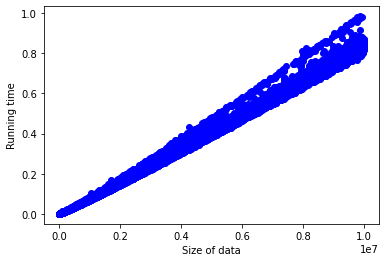

In [45]:
#Plot data train
plt.scatter(train_set.X, train_set.y, color = 'blue')
plt.xlabel("Size of data")
plt.ylabel("Running time")
plt.show()

**X_test, y_test**

In [41]:
#Sử dụng pandas.read_csv để đọc dữ liệu từ file "test.txt"
test_set = pd.read_csv("/content/drive/MyDrive/th1_data/test.txt", names = ["X", "y"], header = None)

In [42]:
#Xem thử 9 bộ đầu
test_set.head(9)

,X,y
0,37837612,4.12166
1,37395246,3.92089
2,36610827,3.21540
3,29555651,2.54506
4,25928216,2.21831
5,30423112,2.61376
6,21881189,1.85961
7,35810179,3.14761
8,35355055,3.07585


In [43]:
#Desrcibe bộ test
test_set.describe()

,X,y
count,1.059000e+04,10590.000000
mean,2.999277e+07,2.642812
std,5.759381e+06,0.537305
min,2.000026e+07,1.669640
25%,2.503806e+07,2.180550
50%,2.994436e+07,2.639820
75%,3.500845e+07,3.100155
max,3.999734e+07,4.287660


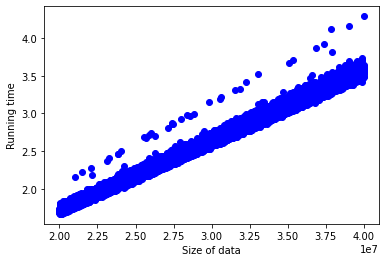

In [46]:
#Plot data test
plt.scatter(test_set.X, test_set.y, color = 'blue')
plt.xlabel("Size of data")
plt.ylabel("Running time")
plt.show()

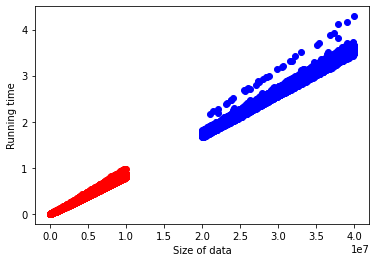

In [67]:
#Plotting train_set và test_set cùng đồ thị, red là train, blue là test

plt.scatter(train_set.X, train_set.y, color = 'red')
plt.scatter(test_set.X, test_set.y, color = 'blue')
plt.xlabel("Size of data")
plt.ylabel("Running time")
plt.show()

# **MODELING** 


# **TRAIN MODEL**

In [11]:
#Train model
clf = LinearRegression()

In [48]:
X_train = np.asanyarray(train_set[['X']])
y_train = np.asanyarray(train_set[['y']])
clf.fit(X_train, y_train)

# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ', clf.intercept_)

Coefficients:  [[8.45569856e-08]]
Intercept:  [-0.01589553]


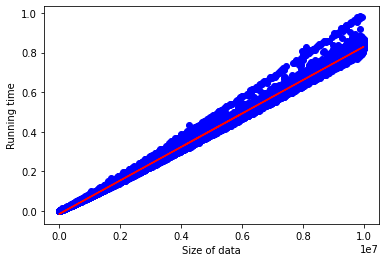

In [50]:
#Plot fit line on train_set
plt.scatter(train_set.X, train_set.y, color = 'blue')
plt.plot(X_train, clf.coef_[0][0]*X_train + clf.intercept_[0], '-r')
plt.xlabel("Size of data")
plt.ylabel("Running time")
plt.show()

# **TEST MODEL**

**Tính y_pred từ model vừa train**

In [51]:
X_test = test_set[['X']]
y_test = test_set[['y']]

In [52]:
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [53]:
y_pred

array([[3.18353889],
       [3.14613375],
       [3.07980564],
       ...,
       [2.81848194],
       [1.78037084],
       [1.79197375]])

In [54]:
y_test

,y
0,4.12166
1,3.92089
2,3.21540
3,2.54506
4,2.21831
...,...
10585,2.35117
10586,1.79155
10587,2.90918
10588,1.80292


In [59]:
#Lập bảng so sánh y_pred và y_test
y_pred1 = pd.DataFrame(y_pred, columns = ['y_pred'])
y_test1 = y_test.rename(columns = {'y':'y_test'})
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew

,y_test,y_pred
0,4.12166,3.183539
1,3.92089,3.146134
2,3.21540,3.079806
3,2.54506,2.483241
4,2.21831,2.176516
...,...,...
10585,2.35117,2.256362
10586,1.79155,1.738984
10587,2.90918,2.818482
10588,1.80292,1.780371


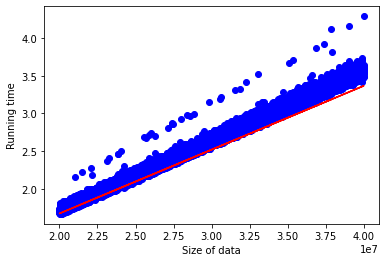

In [64]:
#Plotting fit line on test_set 
plt.scatter(test_set.X, test_set.y, color = 'blue')
plt.plot(X_test, clf.coef_[0][0]*X_test + clf.intercept_[0], '-r')
plt.xlabel("Size of data")
plt.ylabel("Running time")
plt.show()

**Đánh giá bằng điểm MSE, R2, MAE**

In [66]:
print('MSE:', round(MSE(y_test, y_pred), 6))
print('MAE:', round(MAE(y_test, y_pred), 6))
print('R2:', round(R2(y_test, y_pred), 6))

MSE: 0.020665
MAE: 0.122712
R2: 0.928413


**Đánh giá:**
- Điểm R2 khá tốt.
- Điểm MSE và MAE khá thấp, bởi vì giá trị y ban đầu đều khá nhỏ.
- Dựa trên kết quả từ bảng so sánh y_test, y_pred và khi vẽ fit line lên bộ test, có thể thấy model có góc tăng khá thấp so với bộ test, nên với các giá trị x càng lớn, y_pred và y_test càng lệch.
- Nguyên nhân có thể là do có sự khác biệt khá rõ ràng giữa tập train và tập test, khi giá trị X, y của tập train từ xấp xĩ [0-1] còn tập test xấp xỉ [2-4] (dễ thấy từ kết quả desribe và plotting hai tập dữ liệu). Cách khắc phục có thể là nên tăng tính đa dạng, khách quan cho tập train hơn so với bộ ban đầu.